In [1]:
import pandas as pd, numpy as np
import random
# from bs4 import BeautifulSoup
# from faker import Faker
import seaborn as sns
import math
from matplotlib import pyplot as plt
#initialize Faker
# fake=Faker()

In [75]:
age = []
gender = []
height = []
glucose_level = []
diabetic = []
weight = []
member = []

n_names=2000
for n in range(n_names):
#  Age
    age.append(np.random.choice(np.arange(22,80,3)))
# Gender    
    gender=np.random.choice([0,1],n_names, p=[.55,.45])
# Hight in cm    
    height_val = [147,150,152,155,157,160,163,165,168,170,173,175,178,180,183,185,188,191,193]
    height.append(np.random.choice(height_val))
#  Weight     
    weight.append(np.random.choice(np.arange(40,105,5)))
        
#     physical_cat = ['High','Moderate','Low']
    physical_cat = [2,1,0]
    physical = np.random.choice(physical_cat,n_names,p=['.11','.49','.40'])
    
    life_style_smoker =[0,1]
    life_style = np.random.choice(life_style_smoker,n_names,p=['.88','.12'])
    
    member_diabetic = ['Father','Mother','Sister','Brother','None','Mother;Father','Father;Mother;Sister','Mother;Sister',
                      'Mother;Brother','Father;Sister','Father;Brother','Father;Mother;Brother','Father;Mother;Sister;Brother']
    member_diabetic = np.random.choice(member_diabetic,n_names,p=['.30','.15','.03','.04','.38','.025','0.005','0.005',
                                                                        '.005','.01','0.02','0.01','0.02'])

    
    member.append(np.random.choice(np.arange(0,5)))
    
#     blood_cat = ['Normal','Elivated','High','Very High','Extremely High']
#     blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    blood_cat = [0,1,2,3,4]
    blood_pressure = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    glucose_level.append(np.random.choice(np.arange(70,310,5)))
    
    
    
variables=[age,gender,height,weight,
           physical,life_style,member_diabetic,blood_pressure,glucose_level]

df_diabetes=pd.DataFrame(variables).transpose()
df_diabetes.columns=["Age","Gender","Height (centimeters)","Weight (Kg)","Physical Activities",
                     "Life Style (Smoking)","Member Diabetic","Blood Pressure","Glucose Level (Random mg/dl)"]
    
    
    


In [76]:
df_diabetes['BMI'] = df_diabetes.apply(lambda x: round(x["Weight (Kg)"]/(math.pow(x['Height (centimeters)']/100,2)),1),axis=1)

In [77]:
def convert_to_int(x):
    return int(x)

In [78]:
df_diabetes['Age'] = df_diabetes['Age'].apply(lambda x:convert_to_int(x))
df_diabetes['Gender'] = df_diabetes['Gender'].apply(lambda x:convert_to_int(x))
df_diabetes['Height (centimeters)'] = df_diabetes['Height (centimeters)'].apply(lambda x:convert_to_int(x))
df_diabetes['Weight (Kg)'] = df_diabetes['Weight (Kg)'].apply(lambda x:convert_to_int(x))
df_diabetes['Physical Activities'] = df_diabetes['Physical Activities'].apply(lambda x:convert_to_int(x))
df_diabetes['Life Style (Smoking)'] = df_diabetes['Life Style (Smoking)'].apply(lambda x:convert_to_int(x))
df_diabetes['Blood Pressure'] = df_diabetes['Blood Pressure'].apply(lambda x:convert_to_int(x))
df_diabetes['Glucose Level (Random mg/dl)'] = df_diabetes['Glucose Level (Random mg/dl)'].apply(lambda x:convert_to_int(x))

In [79]:
def diabetic_logic(x):
    calculation = 0
    alert = 0
    info = 0
    success = 0
    if x['Glucose Level (Random mg/dl)'] < 140:
        success = 1
    elif x['Glucose Level (Random mg/dl)'] >=140 and  x['Glucose Level (Random mg/dl)'] < 199:
        info = 1
        calculation+=25
    else:
        alert = 1
        calculation+=50
        
    matching_meb = set(x['Member Diabetic'].split(";")) & set(['Mother','Father','Sister','Brother'])
    if len(matching_meb) > 0:
        for i in matching_meb:
            if i.lower() == "Father".lower():
                calculation+=7.5
            if i.lower() == "Mother".lower():
                calculation+=10
            if i.lower() == "Brother".lower():
                calculation+=3.75
            if i.lower() == "Sister".lower():
                calculation+=3.75

#     if x['Member Diabetic']:
#         calculation+=25
        
        
        
#     if x['Blood Pressure'].lower() == 'High'.lower():
#         calculation+=3
#     elif x['Blood Pressure'].lower() == 'Very High'.lower():
#         calculation+=4
#     elif x['Blood Pressure'].lower() == 'Extremely High'.lower():
#         calculation+=5
        
    if x['Blood Pressure'] == 2:
        calculation+=3
    elif x['Blood Pressure'] == 3: 
        calculation+=4
    elif x['Blood Pressure'] == 4:
        calculation+=5    
    

    if x['BMI'] >=25.0 and x['BMI'] <=29.9:
        # Overweight
        calculation+=4
    elif x['BMI'] >= 30.0:
#         Obesity
        calculation+=5 
        
    if x['Physical Activities'] == 0:
        calculation+=5
        
    if x['Life Style (Smoking)'] == 1:
        calculation+=5
    
    if x['Age'] > 40 and x['Age'] < 60:
        calculation+=4
    elif x['Age'] > 60:
        calculation+=5
        
#     if alert == 1 :
#         return 1, calculation
#     elif alert == 0 :
#         return 0, calculation

#     if calculation >= 60 :
#         return 1, calculation
#     elif calculation < 60 :
#         return 0, calculation
    if success:
        return -1, calculation
    if info:
        if calculation >= 38 and calculation <= 61:
            return 0, calculation
        if calculation < 38:
            return -1, calculation
        if calculation > 61:
            return 1, calculation
    if alert:
        if calculation <= 61:
            return 0, calculation
        else:
            return 1,calculation
    

In [80]:
df_diabetes['Diagnose'],df_diabetes['Severity']= zip(*df_diabetes.apply(lambda x: diabetic_logic(x), axis=1))

In [81]:
df_diabetes.drop(['Severity'],axis=1,inplace=True)

In [82]:
df_diabetes.corr()*100

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
Age,100.000000,-2.392010,-2.454269,-1.338525,3.459640,-2.512011,-0.153906,-3.533914,0.328702,5.359351
Gender,-2.392010,100.000000,0.414654,-1.793156,-0.327318,-0.628780,3.080225,1.280957,-1.363804,1.150235
Height (centimeters),-2.454269,0.414654,100.000000,-0.220268,0.254847,0.381692,2.019884,0.324417,-51.922159,-4.802311
Weight (Kg),-1.338525,-1.793156,-0.220268,100.000000,-0.205363,0.880341,-1.872229,0.093621,84.227438,9.701610
Physical Activities,3.459640,-0.327318,0.254847,-0.205363,100.000000,-2.661829,-1.632310,1.911477,-0.400130,-10.459847
Life Style (Smoking),-2.512011,-0.628780,0.381692,0.880341,-2.661829,100.000000,-1.838190,-0.254642,0.978598,5.096761
Blood Pressure,-0.153906,3.080225,2.019884,-1.872229,-1.632310,-1.838190,100.000000,-4.555788,-2.836948,3.042638
Glucose Level (Random mg/dl),-3.533914,1.280957,0.324417,0.093621,1.911477,-0.254642,-4.555788,100.000000,-0.275653,80.421972
BMI,0.328702,-1.363804,-51.922159,84.227438,-0.400130,0.978598,-2.836948,-0.275653,100.000000,10.503840
Diagnose,5.359351,1.150235,-4.802311,9.701610,-10.459847,5.096761,3.042638,80.421972,10.503840,100.000000


<AxesSubplot:>

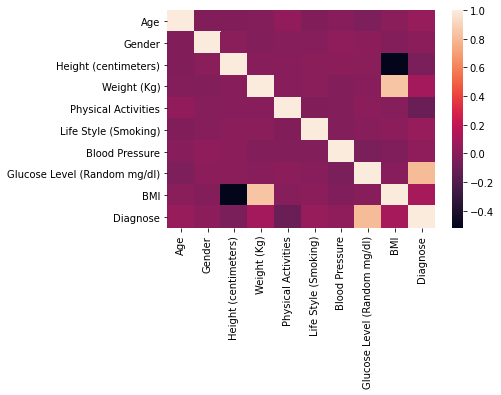

In [83]:
sns.heatmap(df_diabetes.corr())

In [87]:
# df_diabetes.to_csv("Datasets/AutoGeneratedDatasetInt.csv",index=False)

In [ ]:
# Lets start converting data into integer values

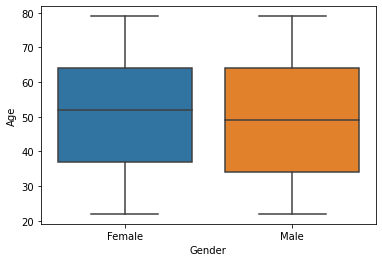

In [181]:
sns.boxplot(y=df_diabetes['Age'],x=df_diabetes['Gender'])

In [90]:
df_diabetes['Physical Activities'].unique()

# 0 Low 
# 1 Moderate 
# 2 High

array([0, 1, 2], dtype=int64)

In [351]:
# Converting from string to integer 
physical = pd.get_dummies(df_diabetes['Physical Activities'],prefix='Physically',drop_first=True)
smoking = pd.get_dummies(df_diabetes['Life Style (Smoking)'],prefix="Smoking",drop_first=True)
bp = pd.get_dummies(df_diabetes['Blood Pressure'],prefix="BP",drop_first=True)
status = pd.get_dummies(df_diabetes['Diagnoses'],drop_first=True)
status

In [362]:
member_ = pd.get_dummies(df_diabetes['Member Diabetic'],prefix='Member',drop_first=True)
member_

,Member_1
0,0
1,0
2,0
3,1
4,0
...,...
1995,1
1996,0
1997,1
1998,0


In [363]:
diabetes = df_diabetes.copy()

In [364]:
diabetes = pd.concat([diabetes,physical,bp,sex,smoking,status],axis=1)
diabetes.head(3)

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnoses,Physically_1,Physically_2,BP_2,BP_3,BP_4,BP_5,Male,Smoking_Yes,Non-diabetic
0,70,Male,178,80,1,No,0,1,115,25.2,Non-diabetic,1,0,0,0,0,0,1,0,1
1,61,Female,152,95,2,No,0,4,275,41.1,Diabetic,0,1,0,0,1,0,0,0,0
2,70,Female,185,85,0,No,0,1,280,24.8,Diabetic,0,0,0,0,0,0,0,0,0


In [365]:
diabetes.drop(['Gender','Life Style (Smoking)','Physical Activities','Blood Pressure','Diagnoses'],axis=1,inplace=True)

In [366]:
diabetes.head(3)

,Age,Height (centimeters),Weight (Kg),Member Diabetic,Glucose Level (Random mg/dl),BMI,Physically_1,Physically_2,BP_2,BP_3,BP_4,BP_5,Male,Smoking_Yes,Non-diabetic
0,70,178,80,0,115,25.2,1,0,0,0,0,0,1,0,1
1,61,152,95,0,275,41.1,0,1,0,0,1,0,0,0,0
2,70,185,85,0,280,24.8,0,0,0,0,0,0,0,0,0


In [367]:
diabetes.corr()

,BMI,Physically_1,Physically_2,BP_2,BP_3,BP_4,BP_5,Male,Smoking_Yes,Non-diabetic
BMI,1.000000,0.015045,-0.013412,0.002791,0.013721,0.029838,0.008576,0.007424,0.008303,0.018796
Physically_1,0.015045,1.000000,-0.333896,0.006213,0.003234,-0.022182,-0.000986,-0.002686,0.001060,0.046033
Physically_2,-0.013412,-0.333896,1.000000,0.018638,-0.003066,0.010623,-0.013978,-0.005491,0.003072,-0.043880
BP_2,0.002791,0.006213,0.018638,1.000000,-0.138694,-0.122838,-0.071468,0.003955,0.027276,0.009623
BP_3,0.013721,0.003234,-0.003066,-0.138694,1.000000,-0.131758,-0.076658,-0.014405,0.000227,-0.008708
BP_4,0.029838,-0.022182,0.010623,-0.122838,-0.131758,1.000000,-0.067894,0.016309,-0.014993,-0.007510
BP_5,0.008576,-0.000986,-0.013978,-0.071468,-0.076658,-0.067894,1.000000,-0.014347,-0.040971,-0.012946
Male,0.007424,-0.002686,-0.005491,0.003955,-0.014405,0.016309,-0.014347,1.000000,-0.021958,0.014388
Smoking_Yes,0.008303,0.001060,0.003072,0.027276,0.000227,-0.014993,-0.040971,-0.021958,1.000000,0.014620
Non-diabetic,0.018796,0.046033,-0.043880,0.009623,-0.008708,-0.007510,-0.012946,0.014388,0.014620,1.000000


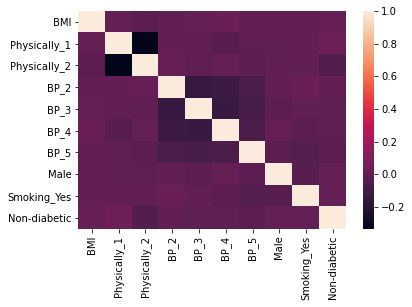

In [368]:
sns.heatmap(diabetes.corr())

In [135]:
dm.groupby(['Blood Pressure (Systolic and/or diastolic) mmhg','Are you a diabetic patient ?']).size()

Blood Pressure (Systolic and/or diastolic) mmhg                        Are you a diabetic patient ?
Elevated (Between 120-129 and below 80 )                               No                               8
                                                                       Yes (Type I)                     1
                                                                       Yes (Type II)                    1
High Blood Pressure: Stage 1 (Between 130-139 or 80-89)                No                               2
                                                                       No idea                          1
                                                                       Yes (Type II)                    1
High Blood Pressure: Stage 2 (140 or higher or 90 or higher)           No                               1
                                                                       No idea                          1
                                                    

In [146]:
dm[dm['Are you a diabetic patient ?']=='Yes (Type I)']

,Timestamp,Age,Gender,Lifestyle: are you a smoker?,Is there any diabetic member in your family ? Please specify your relation with him/her,Lifestyle: physical activity in daily routine,Select your height,Weight (kg),Have you ever been diagnose with High Blood Pressure ?,Blood Pressure (Systolic and/or diastolic) mmhg,Fasting Blood Glucose level (mg/dL),Are you a diabetic patient ?
17,2020/08/06 2:56:31 PM GMT+5,Below 40,Other,Yes,Father;Mother;Sister;Brother;Don't Know,Not at all,6' 4'' (193 CM),100+,Yes,Hypertensive: Extremely high (Higher than 180 ...,200.0,Yes (Type I)
39,2020/08/07 5:46:14 PM GMT+5,Below 40,Male,No,Don't Know,Moderate,5' 7'' (170 CM),51 - 60,No,Normal (Below 120 and 80),NaN,Yes (Type I)
45,2020/08/07 5:59:49 PM GMT+5,Younger than 40,Female,No,Don't Know,High,5' 3'' (160 CM),40 - 50,No,Elevated (Between 120-129 and below 80 ),168.0,Yes (Type I)


In [ ]:

def diabetic_logic(x):
    calculation = 0
    alert = 0
    info = 0
    success = 0
    print("--------------------------")
    print(x['Glucose Level (Random mg/dl)'])
    if x['Glucose Level (Random mg/dl)'] < 140:
        success = 1
        print("Glucose in normal Range")
    elif x['Glucose Level (Random mg/dl)'] >=140 and  x['Glucose Level (Random mg/dl)'] < 199:
        print("Glucose in prediabetic range")
        info = 1
        calculation+=25
    else:
        print("Diabetic stage")
        alert = 1
        print("Alert")
        calculation+=50
        
    matching_meb = set(x['Member Diabetic'].split(";")) & set(['Mother','Father','Sister','Brother'])
    if len(matching_meb) > 0:
        for i in matching_meb:
            if i.lower() == "Father".lower():
                print("Father")
                calculation+=7.5
            if i.lower() == "Mother".lower():
                print("Mother")
                calculation+=10
            if i.lower() == "Brother".lower():
                print("Brother")
                calculation+=3.75
            if i.lower() == "Sister".lower():
                print("Sister")
                calculation+=3.75
    'Normal','Elivated','High','Very High','Extremely High'
    if x['Blood Pressure'].lower() == 'High'.lower():
        print("High BP")
        calculation+=3
    elif x['Blood Pressure'].lower() == 'Very High'.lower():
        print("Very High BP")
        calculation+=4
    elif x['Blood Pressure'].lower() == 'Extremely High'.lower():
        print("Extremely High BP")
        calculation+=5
    
    
#     if x['BMI'] < 18.5:
#         # Underweight
#     elif x['BMI'] >=18.5 and x['BMI'] <=24.9:
#         # Normal Healthy
    if x['BMI'] >=25.0 and x['BMI'] <=29.9:
        # Overweight
        print("Overweight")
        calculation+=4
    else:
        print("Obesity")
        calculation+=5 
        
#         Obesity
    if x['Physical Activities'].lower()  == "Low".lower():
        print("Low Activities")
        calculation+=3
    elif x['Physical Activities'].lower() == "Not at all".lower():
        print("Not at all")
        calculation+=5
        
    if x['Life Style (Smoking)'].lower() == "Yes".lower():
        print("Smoking")
        calculation+=5
    
    if x['Age'] > 40 and x['Age'] < 60:
        print("Over 40 below 60")
        calculation+=4
        
    elif x['Age'] > 60:
        print("Over 60")
        calculation+=5
    print("calculation : ",calculation)
    print("----------------------------")
    if alert:
        return "Diabetic"
#         if calculation >= 70:
#             return "Diabetic, Extremely High Risk"
#         if calculation < 70:
#             return "Diabetic"
            
    elif info:
        return "Prediabetic"
#         if calculation >= 80:
#             return "Prediabetic, Extremely High Risk Developing Diabetes"
#         if calculation <= 50:
#             return "Prediabetic"
    elif success:
        return "Non-diabetic"
#         if calculation > 50:
#             return "Non Diabetic, But has risk"
#         if calculation < 50:
#             return "Non Diabetic"
        
    

In [17]:
age = []
sex = []
height = []
weight = []
physical_activities = []
life_style_smoker = []
member_diabetic = []
glucose_level = []
blood_pressure = []
diabetic = []

n_names=2000
for n in range(n_names):
    age.append(fake.)
    company.append(fake.company())
    claim_reason=["Medical","Travel","Phone","Other"]
    Confidentiality_level=["High","Low","Medium","Very low"]
    claim_confidentiality_dict=dict(zip(claim_reason,Confidentiality_level))
    claim_reasons=np.random.choice(claim_reason,n_names, p=[.55,.15,.15,.15])
    claim_confidentiality_levels=[claim_confidentiality_dict[claim_reasons[i]] for i in range(len(claim_reasons))]
variables=[age,company,claim_reasons,claim_confidentiality_levels]
df=pd.DataFrame(variables).transpose()
df.columns=["Customer Name","Customer Address","Company Name","Claim Reason","Data confidentiality"]
df["Customer Address"]=df["Customer Address"].str.replace("\n",",")

In [276]:
for i in range(70):
    print(np.random.choice(np.arange(0,2)))

1
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
0
0
1
0
1
0


In [4]:
age = []
height = []
glucose_level = []
diabetic = []
weight = []
member = []

n_names=2000
for n in range(n_names):
    age_cat = ['Below 40', '40 - 49','50 - 59','60+']
#     age_confidentiality_level=["High","Medium","Low","Very low"]
#     age_confidentiality_dict=dict(zip(age_cat,age_confidentiality_level))
    age_cats=np.random.choice(age_cat,n_names, p=[.50,.30,.15,.05])
#     age_claim_confidentiality_levels=[age_confidentiality_dict[age_cats[i]] for i in range(len(age_cats))]
    
    age.append(np.random.choice(np.arange(22,80,3)))
    
    sex_cat = ['Male','Female']
    sex_confidentiality_level=["High","Hight"]
    sex_claim_reasons=np.random.choice(sex_cat,n_names, p=[.55,.45])
    
    height_val = [147,150,152,155,157,160,163,165,168,170,173,175,178,180,183,185,188,191,193]
    height.append(np.random.choice(height_val))
    
    weight.append(np.random.choice(np.arange(40,105,5)))
    weight_cat = ['40 - 50','51 - 60','61 - 80','81 - 100','100+']
    weight_claim_reasons = np.random.choice(weight_cat,n_names,p=['.20','.30','.27','.21','.02'])
    
#     physical_cat = ['High','Moderate','Low']
    physical_cat = [2,1,0]
    physical_claim_reason = np.random.choice(physical_cat,n_names,p=['.11','.49','.40'])
    
    life_style_smoker =['No','Yes']
    life_style_claim = np.random.choice(life_style_smoker,n_names,p=['.88','.12'])
    
    member_diabetic = ['Father','Mother','Sister','Brother','None','Mother;Father','Father;Mother;Sister','Mother;Sister',
                      'Mother;Brother','Father;Sister','Father;Brother','Father;Mother;Brother','Father;Mother;Sister;Brother']
    member_diabetic_claim = np.random.choice(member_diabetic,n_names,p=['.30','.15','.03','.04','.38','.025','0.005','0.005',
                                                                        '.005','.01','0.02','0.01','0.02'])

    
    member.append(np.random.choice(np.arange(0,2)))
    
#     blood_cat = ['Normal','Elivated','High','Very High','Extremely High']
#     blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    blood_cat = [1,2,3,4,5]
    blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    glucose_level.append(np.random.choice(np.arange(70,310,5)))
    
    
    
variables=[age,sex_claim_reasons,height,weight,
           physical_claim_reason,life_style_claim,member,blood_cat_claim,glucose_level]

df_diabetes=pd.DataFrame(variables).transpose()
df_diabetes.columns=["Age","Gender","Height (centimeters)","Weight (Kg)","Physical Activities",
                     "Life Style (Smoking)","Member Diabetic","Blood Pressure","Glucose Level (Random mg/dl)"]
    
    
    


In [ ]:
number = 10
if number > 4 and number < 8:
    print("first")
else:
    print()